<a href="https://colab.research.google.com/github/CRAdharsh/ACM_Task_C.R.Adharsh/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn

# Process 1 : Dataset Selection

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

# Process 2 : Preprocessing

In [2]:
import pandas as pd
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
df.loc[0:5, 'sepal length (cm)'] = None
df.loc[3:10, 'sepal width (cm)'] = None
df.loc[2:7, 'petal length (cm)'] = None
df.loc[3:9, 'petal width (cm)'] = None
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  NaN               3.5                1.4               0.2
1                  NaN               3.0                1.4               0.2
2                  NaN               3.2                NaN               0.2
3                  NaN               NaN                NaN               NaN
4                  NaN               NaN                NaN               NaN
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:
df_filled = df.fillna(df.mean())
print(df_filled)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             5.880556          3.500000           1.400000          0.200000
1             5.880556          3.000000           1.400000          0.200000
2             5.880556          3.200000           3.853472          0.200000
3             5.880556          3.038732           3.853472          1.246853
4             5.880556          3.038732           3.853472          1.246853
..                 ...               ...                ...               ...
145           6.700000          3.000000           5.200000          2.300000
146           6.300000          2.500000           5.000000          1.900000
147           6.500000          3.000000           5.200000          2.000000
148           6.200000          3.400000           5.400000          2.300000
149           5.900000          3.000000           5.100000          1.800000

[150 rows x 4 columns]


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filled)
print(df_pca)

[[-2.51881340e+00  8.90182319e-01]
 [-2.47932711e+00  5.59694744e-01]
 [-3.80858731e-01  2.41443402e-01]
 [ 7.92121751e-16  2.40010839e-16]
 [ 8.12994038e-16  2.32364977e-16]
 [ 8.12994038e-16  2.32364977e-16]
 [-4.57261069e-01 -9.17016790e-01]
 [-3.14428978e-01 -6.30573368e-01]
 [-2.64294001e+00 -6.09792130e-01]
 [-2.37822558e+00 -2.70097398e-01]
 [-2.56780847e+00  2.22806402e-01]
 [-2.72441254e+00  1.35706320e-02]
 [-2.90033685e+00 -2.01218918e-01]
 [-3.33739991e+00 -5.04194557e-01]
 [-2.75941313e+00  1.19970246e+00]
 [-2.49785780e+00  1.31164020e+00]
 [-2.73784420e+00  8.03039146e-01]
 [-2.76236964e+00  3.18338390e-01]
 [-2.31329033e+00  8.91217429e-01]
 [-2.69988710e+00  4.98271388e-01]
 [-2.42399009e+00  4.24876219e-01]
 [-2.65682512e+00  4.19292456e-01]
 [-3.32866900e+00  1.12701230e-01]
 [-2.41772272e+00  1.05301886e-01]
 [-2.46588959e+00 -4.15080073e-02]
 [-2.62140745e+00 -1.07597717e-01]
 [-2.58266705e+00  1.31029509e-01]
 [-2.67565202e+00  3.84471116e-01]
 [-2.75392908e+00  3

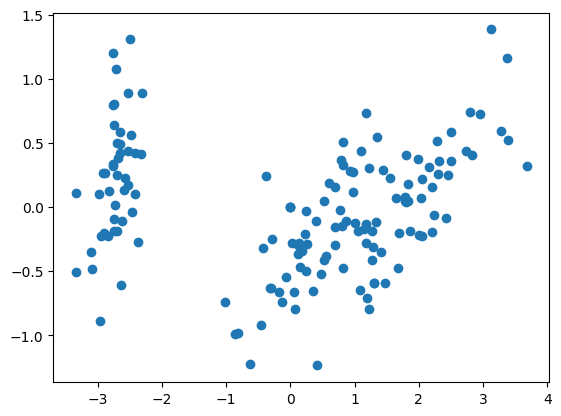

In [6]:
import matplotlib.pyplot as plt
X = df_pca[:,0]
y = df_pca[:,1]
plt.scatter(X,y)
plt.show()

# Process 3 : Model Development ( KMeans )

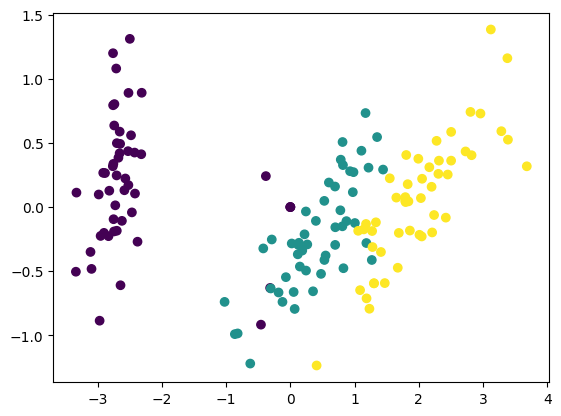

In [7]:
plt.scatter(X,y,c=iris['target'])
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmeans_dataset = KMeans(n_clusters = 2, random_state = 0)
kmeans_dataset.fit(df_pca)
print(kmeans_dataset.inertia_)

149.693603648637


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


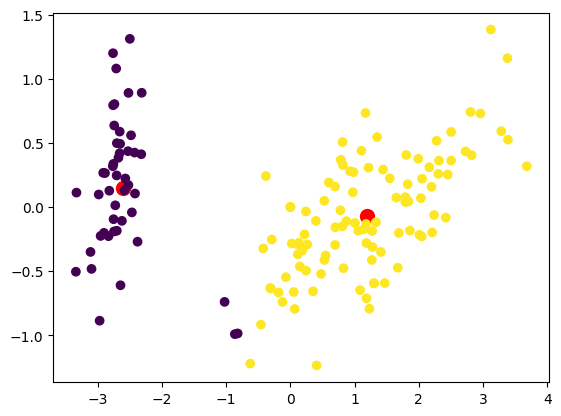

In [9]:
X1=kmeans_dataset.cluster_centers_[:,0]
y1=kmeans_dataset.cluster_centers_[:,1]
plt.scatter(X1,y1,s=100,c='red')
plt.scatter(X,y,c=kmeans_dataset.labels_)
plt.show()

# Process 3 : Model Selection ( DBSCAN )

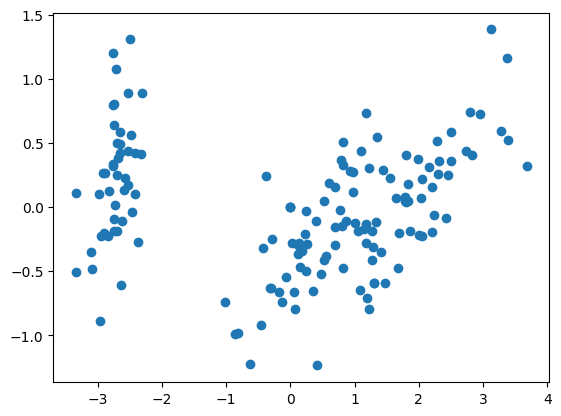

In [10]:
import matplotlib.pyplot as plt
X = df_pca[:,0]
y = df_pca[:,1]
plt.scatter(X,y)
plt.show()

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan_dataset = DBSCAN(eps=0.5, min_samples=5)
dbscan_dataset.fit(df_pca)
if len(set(dbscan_dataset.labels_)) > 1:
    score = silhouette_score(df_pca, dbscan_dataset.labels_)
    print(f'Silhouette Score: {score:.3f}')
else:
    print('Silhouette Score cannot be computed (not enough clusters or only noise).')

Silhouette Score: 0.502


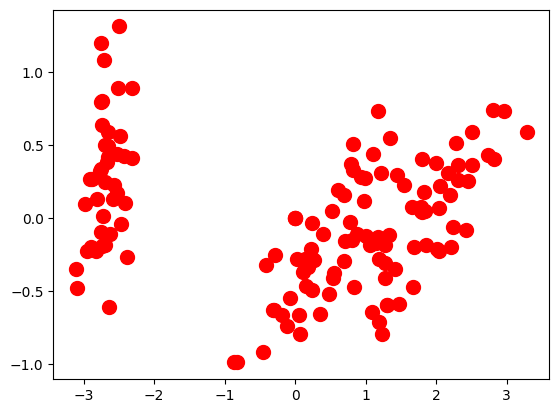

In [34]:
X2 = dbscan_dataset.components_[:,0]
y2 = dbscan_dataset.components_[:,1]
plt.scatter(X2,y2,s=100,c='red')

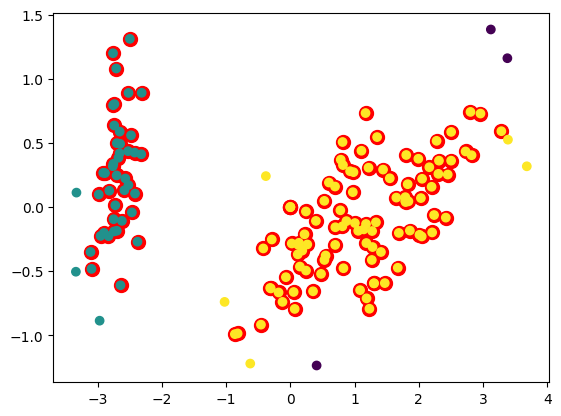

In [30]:
X2 = dbscan_dataset.components_[:,0]
y2 = dbscan_dataset.components_[:,1]
plt.scatter(X2,y2,s=100,c='red')
plt.scatter(X,y,c=dbscan_dataset.labels_)

# Process 4 : Results and insights

**Cluster identification process**



*   DBSCAN focuses on the density of the points for finding clusters.
*   KMeans sects a centroid and finds the points near to it as a cluster.



**Score process**



*   DBSCAN does'nt have a scoring system, so it uses a metric system called silhouette score for it callculation.
*   KMeans has scoring system (inertia_), which finds sum of square of the distance from the sample to their closest centroid.

